<a href="https://colab.research.google.com/github/chelseaquilling/BurdenSharingDashboard/blob/main/FinalProject_ChelseaQuilling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defense Expenditure as Share of GDP (2021)
Source: NATO (2021). Defense Expenditure of NATO Countries (2014 – 2021).  Press Release (2021) 094 Issued on 11 Jun. 2021. https://www.nato.int/nato_static_fl2014/assets/pdf/2021/6/pdf/210611-pr-2021-094-en.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving nato_gdp.csv to nato_gdp.csv


In [ ]:
nato_df = pd.read_csv("nato_gdp.csv")
nato_df.tail(5)

,Unnamed: 0,2021e
27,Turkey,1.570000
28,United Kingdom,2.290000
29,United States,3.520000
30,NATO Avg.,1.805862
31,NATO Europe Avg.,1.737308


In [ ]:
nato_df.rename(columns = {'Unnamed: 0' : 'Ally'}, inplace=True)

In [ ]:
new_df = nato_df.dropna()
new_df.head()

,Ally,2021e
0,Albania,1.44
1,Belgium,1.12
2,Bulgaria,1.56
3,Canada,1.39
4,Croatia,2.79


In [ ]:
Percent_df = new_df.rename(columns = {'Unnamed: 0' : 'Ally'})
Percent_df.head()

,Ally,2021e
0,Albania,1.44
1,Belgium,1.12
2,Bulgaria,1.56
3,Canada,1.39
4,Croatia,2.79


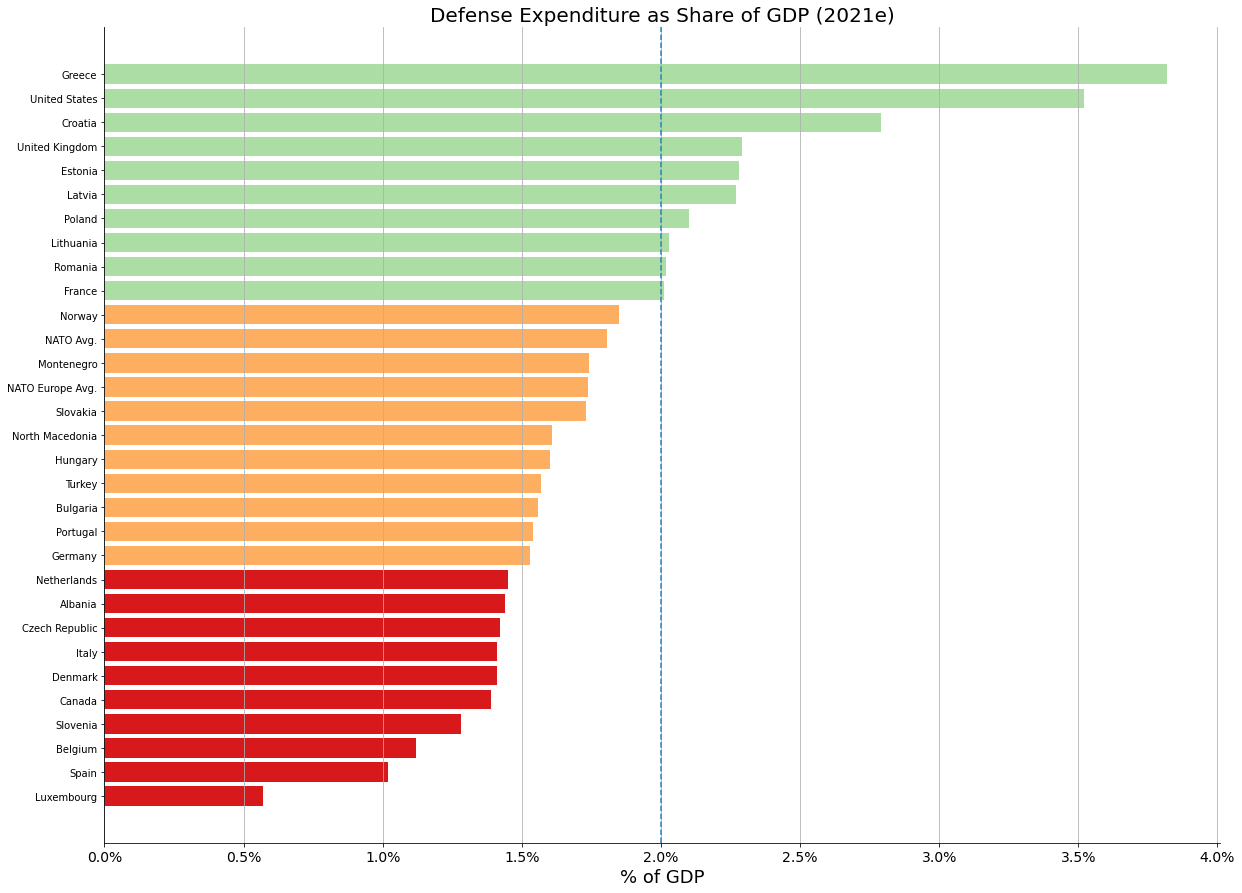

In [ ]:
my_colors = ['#d7191c','#fdae61','#abdda4','#2b83ba'] # I love the colors! I love how this one turned out.
Percent_df.sort_values(by="2021e", inplace=True) 
fig , ax = plt.subplots()
fig.set_size_inches((20,15))
ax.barh(Percent_df['Ally'], Percent_df['2021e'], color = my_colors[2])
ax.axvline(x=2 , c= my_colors[3] , linestyle='--')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4] , fontsize = 14)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(symbol='%', decimals=1))

x = Percent_df['2021e']
y = Percent_df['Ally']

mask1 = x < 2.0     
mask2 = x <= 1.5    



plt.barh(y[mask1], x[mask1], color = my_colors[1])
plt.barh(y[mask2], x[mask2], color = my_colors[0])
 

# average = Percent_df['NATO Avg.', 'NATO Europe Avg.'] #can't figured out how to just change colors of these two bars 
# if average in ['NATO Avg.', 'NATO Europe Avg.']: 
#         average = colors = ("m" , "y")

ax.set_xlabel('% of GDP', fontsize=18)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="x")
ax.set_title('Defense Expenditure as Share of GDP (2021e)', fontsize=20)
fig.savefig('2Percent.png', dpi=300)
plt.show()

# Defense Expenditure by Major Category (2021)
Source: NATO (2021). Defense Expenditure of NATO Countries (2014 – 2021).  Press Release (2021) 094 Issued on 11 Jun. 2021. https://www.nato.int/nato_static_fl2014/assets/pdf/2021/6/pdf/210611-pr-2021-094-en.pdf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving equipment_spending_all.csv to equipment_spending_all (1).csv


In [ ]:
equip_df = pd.read_csv("equipment_spending_all.csv")
equip_df.head(5)

,Ally,Personnel,Equipment,Other*,Infrastructure
0,Albania,50.32,21.30,27.68,0.70
1,Belgium,56.31,18.03,23.99,1.67
2,Bulgaria,56.65,24.77,13.55,5.03
3,Canada,47.50,17.66,31.52,3.32
4,Croatia,45.67,43.50,9.44,1.40


In [ ]:
spend_df = equip_df.loc[  : 31 , : ]
spend_df.reset_index(inplace=True)
spend_df.columns

Index(['index', 'Ally', 'Personnel', 'Equipment', 'Other*', 'Infrastructure'], dtype='object')

In [ ]:
categories = ['Personnel',
               'Equipment', 
              'Infrastructure', 
              'Other*']
    
# Personnel = spend_df[spend_df['Personnel'] == 'Personnel']
# Equipment = spend_df[spend_df['Equipment'] == 'Equipment']
# Infrastructure = spend_df[spend_df['Infrastructure'] == 'Infrastructure']
# Other = spend_df[spend_df['Other*'] == 'Other*']

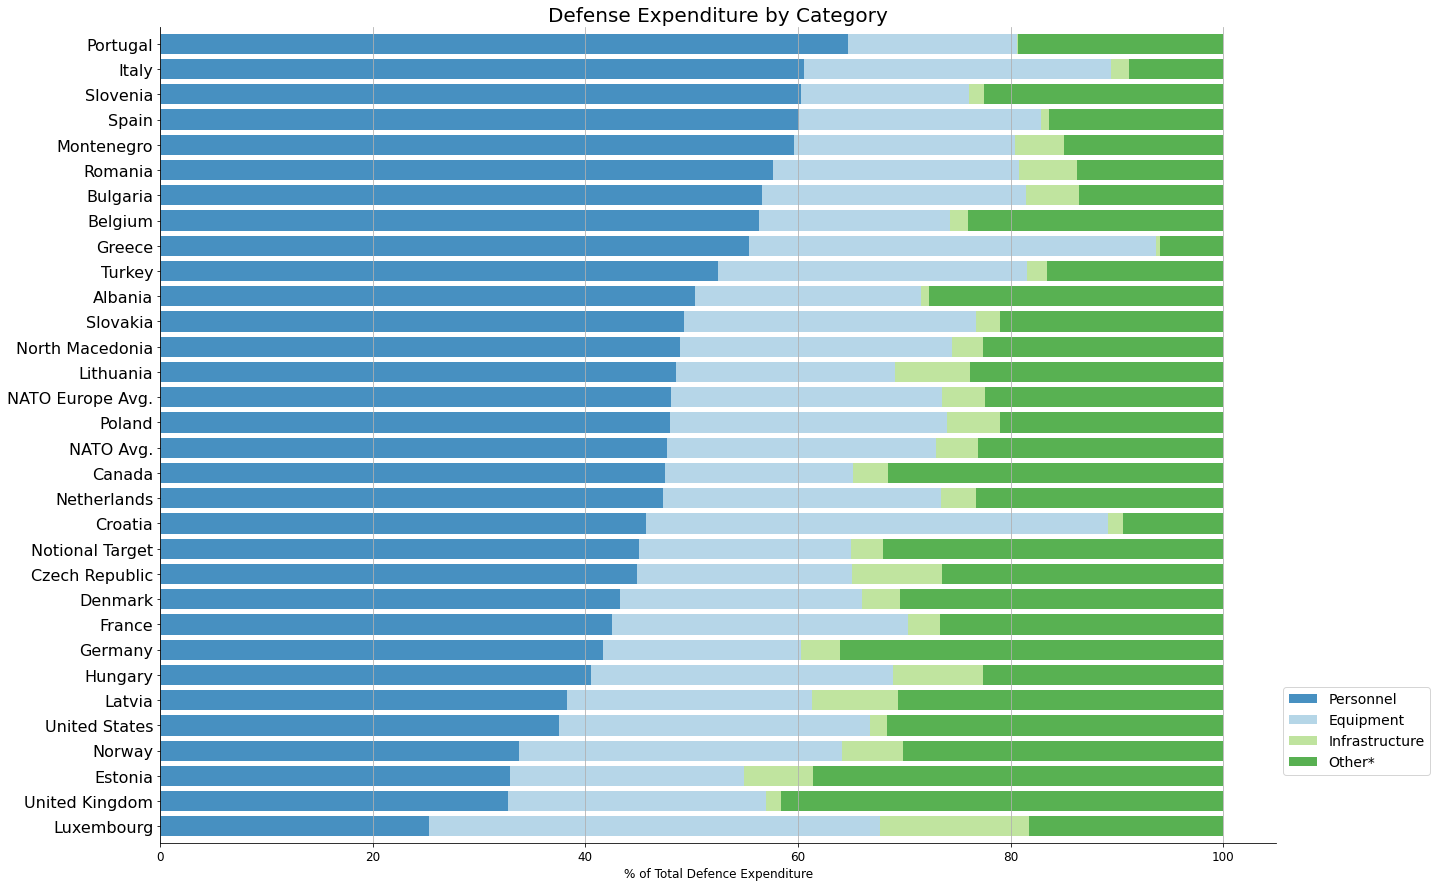

In [ ]:
sorted_df = spend_df.sort_values(by='Personnel')
sorted_df.reset_index(inplace=True)
my_colors = ['#1f78b4','#a6cee3','#b2df8a','#33a02c']
ax = sorted_df[categories].plot(stacked=True, kind='barh', width = .8, color= my_colors, alpha = .82, figsize=(20,15))


for barh in ax.patches:
    height = barh.get_height()
    width = barh.get_width()
    
ax.grid(axis='x')
ax.set_xlabel("% of Total Defence Expenditure", rotation='horizontal' , fontsize=12)
Allies = sorted_df['Ally'].values
ax.set_yticklabels(Allies,rotation='horizontal',fontsize=16)
ax.tick_params(axis="x", labelsize=12)

# plt.legend(fontsize=14, bbox_to_anchor=(1.1, -0.1, -0.95, 0.3))

plt.legend(bbox_to_anchor=(1.0, -0.1, -0.5, 0.3), fontsize=14)

ax.set_title('Defense Expenditure by Category', fontsize=20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig('Spending_categories.png', dpi=500)
plt.show()

# Force Useability 
Sources: UN Rapid Deployment Level (RDL); 
        IISS 2022 Military Balance  

In [ ]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade geopandas
import geopandas
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [ ]:
world_df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world_df.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving force.csv to force.csv


In [ ]:
force_df = pd.read_csv('force.csv')
force_df.head()

,Country,Rank,Score ( /15 )
0,UK,1,15
1,Spain,1,15
2,Germany,1,15
3,USA,1,15
4,France,1,15


In [ ]:
force_df.columns

Index(['Country ', 'Rank', 'Score ( /15 )'], dtype='object')

In [ ]:
new_df = force_df.loc[  : 29 , : ]
new_df.replace({np.nan:"N/A"},inplace=True)
new_df['Country '].replace({"(29) Luxembourg" : "Luxembourg" ,
                        "(29) Iceland": "Iceland"} ,inplace=True )
new_df

,Country,Rank,Score ( /15 )
0,UK,1,15
1,Spain,1,15
2,Germany,1,15
3,USA,1,15
4,France,1,15
5,Poland,6,13
6,Italy,6,13
7,Portugal,8,12
8,Czech Republic,8,12
9,Canada,8,12


In [ ]:
use_df = new_df.rename(columns = {'Country ': 'Ally'})
use_df.head()

,Ally,Rank,Score ( /15 )
0,UK,1,15
1,Spain,1,15
2,Germany,1,15
3,USA,1,15
4,France,1,15


In [ ]:
use_df.columns

Index(['Ally', 'Rank', 'Score ( /15 )'], dtype='object')

In [ ]:
world_df.replace({'United States of America':'USA'}, inplace=True)
world_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,USA,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
for name in world_df['name'].sort_values():
  if name not in list(use_df['Ally']):
    print(name)

Afghanistan
Algeria
Angola
Antarctica
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herz.
Botswana
Brazil
Brunei
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Rep.
Chad
Chile
China
Colombia
Congo
Costa Rica
Cuba
Cyprus
Czechia
Côte d'Ivoire
Dem. Rep. Congo
Djibouti
Dominican Rep.
Ecuador
Egypt
El Salvador
Eq. Guinea
Eritrea
Ethiopia
Falkland Is.
Fiji
Finland
Fr. S. Antarctic Lands
Gabon
Gambia
Georgia
Ghana
Greenland
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
India
Indonesia
Iran
Iraq
Ireland
Israel
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Lebanon
Lesotho
Liberia
Libya
Macedonia
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mexico
Moldova
Mongolia
Morocco
Mozambique
Myanmar
N. Cyprus
Namibia
Nepal
New Caledonia
New Zealand
Nicaragua
Niger
Nigeria
North Korea
Oman
Pakistan
Palestine
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Puerto Rico
Qatar
Russia
Rwanda
S. Suda

In [ ]:
use_df['Ally'].unique()

array([' UK', 'Spain', 'Germany', 'USA', 'France', 'Poland', 'Italy',
       'Portugal', 'Czech Republic', 'Canada', 'Slovenia', 'Romania',
       'Hungary', 'Greece', 'Denmark', ' Belgium', 'Turkey', 'Slovakia',
       'Norway', 'North Macedonia', 'Netherlands', 'Croatia', 'Lithuania',
       'Bulgaria', 'Latvia', 'Estonia', 'Albania', 'Montenegro',
       'Luxembourg', 'Iceland'], dtype=object)

In [ ]:
countries = ([' UK', 'Spain', 'Germany', 'USA', 'France', 'Poland', 'Italy',
       'Portugal', 'Czech Republic', 'Canada', 'Slovenia', 'Romania',
       'Hungary', 'Greece', 'Denmark', ' Belgium', 'Turkey', 'Slovakia',
       'Norway', 'North Macedonia', 'Netherlands', 'Croatia', 'Lithuania',
       'Bulgaria', 'Latvia', 'Estonia', 'Albania', 'Montenegro',
       'Luxembourg', 'Iceland'])

In [ ]:
nato_df = world_df.merge(use_df[["Ally","Score ( /15 )"]], how="left", left_on="name", right_on="Ally")
nato_df.drop(columns=["name"], inplace=True)
nato_df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,Ally,Score ( /15 )
0,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,12.0
4,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,15.0


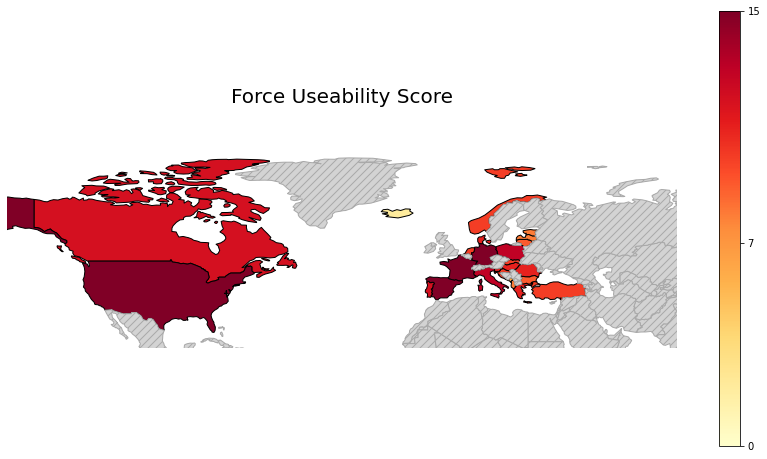

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
nato_df.plot(column='Score ( /15 )', ax=ax, cmap='YlOrRd', vmin=0 , vmax=15,
        missing_kwds= {
         "color": "lightgrey",
         "edgecolor": "darkgrey",
         "hatch": "///",
         "label": "Missing values"} ,
         legend=True,
         legend_kwds={'ticks': [0, 7 , 15]}, edgecolor='black')
ax.axis('off') 
ax.set_xlim(-150 , 75)
ax.set_ylim(20, 100)
ax.set_title('Force Useability Score', fontsize=20)
# ax.spines(visible=False)

fig.savefig('Force_Useability_viz.png', dpi=300)

plt.show()

I also tried to make a storymap but it did not work with my data 

In [ ]:
# nato_df = use_df[['Ally','Score ( /15 )']
# # nato_df = df.sort_values(by='Score ( /15 )', ascending=False)
# # x = 0
# # y = 0
# # cmap = plt.cm.Blues
# # mini= min(nato_df)
# # maxi= max(nato_df)
# # norm = plt.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(value)) for value in nato_df]

# # cmap = mpl.cm.get_cmap(cmap)
# # colors = cmap(np.arange(cmap.N))

# # squarify.plot(sizes= nato_df.values) 
# squarify.plot(sizes=[40, 30, 5, 25])              
# plt.axis('off')
# plt.show()

# # plt.figure(figsize=[12,6])
# # plt.title("Force Useability Scores out of 15", fontsize=20)
# # ax = fig.add_subplot(111, aspect="equal")
# # ax = squarify.plot(df2.nato_df, color=cmap, label=countries, ax=ax, alpha=.7, 
# #                    bar_kwargs=dict(linewidth=1, edgecolor="white"))

# #  

# # img = plt.imshow([nato_df], cmap=cmap)
# # img.set_visible(False)
# # fig.colorbar(img, orientation="vertical", shrink=.96)

# # fig.text(.76, .9, "Force Useability Score", fontsize=14)

# # plt.figure(figsize=(12,8), dpi= 380)
# # squarify.plot(sizes=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75],
# #               colors = cmap(np.arange(cmap.N)),
# #               label= countries) 
# #               pad=True)

# # cmaps['countries'] = cmap_list
# # ax.set_xticks([])
# # ax.set_yticks([])
# # ax.set_title("Rank of ready and capable Ally forces by country", fontsize=14)
# # plt.axis('off')
# # plt.show()

# Current Mission Operations Contributions
(Operation Enhanced Forward Presence as of Feb 2022)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Current_Ops.csv to Current_Ops (1).csv


In [ ]:
efp_df = pd.read_csv("Current_Ops.csv")
efp_df.head()

,Ally,Active Duty Troops 2021,Proportion of NATO Total Active Duty Troops,EFP Troop Contributions as of Feburary 2022,Proportion of total EFP Troops Contributed
0,Albania,7500,0.002278,20,0.004035
1,Belgium,24450,0.007425,1,0.000202
2,Bulgaria,36950,0.011221,0,0.000000
3,Canada,66500,0.020196,572,0.115392
4,Croatia,16700,0.005072,4,0.000807


In [ ]:
new_df = efp_df.drop(columns = ['Active Duty Troops 2021', 'EFP Troop Contributions as of Feburary 2022'])
new_df.columns

Index(['Ally', 'Proportion of NATO Total Active Duty Troops',
       'Proportion of total EFP Troops Contributed '],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


ConversionError: ignored

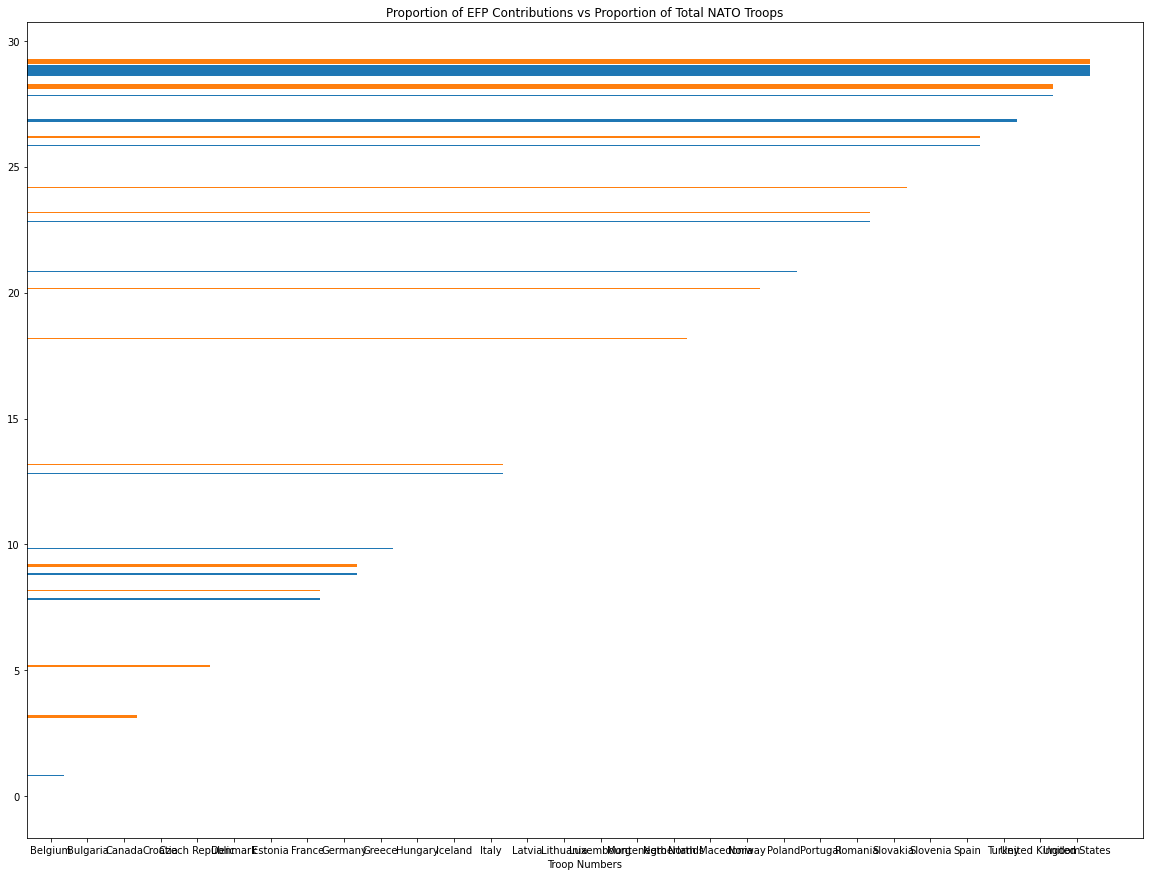

In [ ]:
labels = new_df['Ally']
mission_troops = new_df['Proportion of NATO Total Active Duty Troops']
total_troops = new_df['Proportion of total EFP Troops Contributed ']

y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches((20,15))
bar1 = ax.barh(y - width/2, labels, mission_troops, width, label='Proportion of total EFP Troops Contributed')
bar2 = ax.barh(y + width/2, labels, total_troops, width, label='Proportion of NATO Total Active Duty Troops')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Troop Numbers')
ax.set_title('Proportion of EFP Contributions vs Proportion of Total NATO Troops')
ax.set_yticks(labels ,y)
ax.legend()

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

fig.tight_layout()

plt.show()

# Troops Per Capita (2021) 
Source: 2022 IISS Military Balance

In [ ]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade geopandas
import geopandas
!pip install folium matplotlib mapclassify

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 39.4 MB/s 
     |████████████████████████████████| 16.7 MB 44.4 MB/s 


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving troops_2021.csv to troops_2021.csv


In [ ]:
troops_df = pd.read_csv('troops_2021.csv')
newdf_troops = troops_df.loc[ 0 : 29 , : ]
newdf_troops.columns

Index(['Ally', 'Active Duty Troops 2021', 'Population 2021',
       'Active Duty Troops per capita 2021'],
      dtype='object')

In [ ]:
newdf_troops.dropna(subset=['Active Duty Troops per capita 2021'], inplace= True)
newdf_troops.head()


,Ally,Active Duty Troops 2021,Population 2021,Active Duty Troops per capita 2021
0,Iceland,0,354234,0.000000
1,Albania,7500,3088385,0.002428
2,Belgium,24450,11778842,0.002076
3,Bulgaria,36950,6919180,0.005340
4,Canada,66500,37943231,0.001753


In [ ]:
world_df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
for name in world_df['name'].sort_values():
  if name not in list(newdf_troops['Ally']):
    print(name)

Afghanistan
Algeria
Angola
Antarctica
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belize
Benin
Bhutan
Bolivia
Bosnia and Herz.
Botswana
Brazil
Brunei
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Rep.
Chad
Chile
China
Colombia
Congo
Costa Rica
Cuba
Cyprus
Czechia
Côte d'Ivoire
Dem. Rep. Congo
Djibouti
Dominican Rep.
Ecuador
Egypt
El Salvador
Eq. Guinea
Eritrea
Ethiopia
Falkland Is.
Fiji
Finland
Fr. S. Antarctic Lands
Gabon
Gambia
Georgia
Ghana
Greenland
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
India
Indonesia
Iran
Iraq
Ireland
Israel
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Lebanon
Lesotho
Liberia
Libya
Macedonia
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mexico
Moldova
Mongolia
Morocco
Mozambique
Myanmar
N. Cyprus
Namibia
Nepal
New Caledonia
New Zealand
Nicaragua
Niger
Nigeria
North Korea
Oman
Pakistan
Palestine
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Puerto Rico
Qatar
Russia
Rwanda
S. Sudan
Saudi 

In [ ]:
for name in newdf_troops['Ally']:
  if name not in list(world_df['name']):
    print(name)

Czech Republic
North Macedonia
United States


In [ ]:
world_df['name'].replace({'United States of America':'United States',
                        'Czechia': 'Czech Republic', 
                        'Macedonia' : 'North Macedonia'}, inplace=True)
world_df['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States',
       'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia',
       'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya',
       'Sudan', 'Chad', 'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas',
       'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands',
       'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay',
       'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica',
       'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize',
       'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador',
       'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana',
       'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger',
       'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea',
       'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso',
       'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Zambia',
       'Malawi', 'Mozambique',

In [ ]:
countries = ([' UK', 'Spain', 'Germany', 'USA', 'France', 'Poland', 'Italy',
       'Portugal', 'Czech Republic', 'Canada', 'Slovenia', 'Romania',
       'Hungary', 'Greece', 'Denmark', ' Belgium', 'Turkey', 'Slovakia',
       'Norway', 'North Macedonia', 'Netherlands', 'Croatia', 'Lithuania',
       'Bulgaria', 'Latvia', 'Estonia', 'Albania', 'Montenegro',
       'Luxembourg', 'Iceland'])

In [ ]:
troopcap_df = world_df.merge(newdf_troops[['Ally','Active Duty Troops per capita 2021']], how="left", left_on="name", right_on="Ally")
troopcap_df.drop(columns=["name"], inplace=True)
troopcap_df["Ally"]

0                NaN
1                NaN
2                NaN
3             Canada
4      United States
           ...      
172              NaN
173       Montenegro
174              NaN
175              NaN
176              NaN
Name: Ally, Length: 177, dtype: object

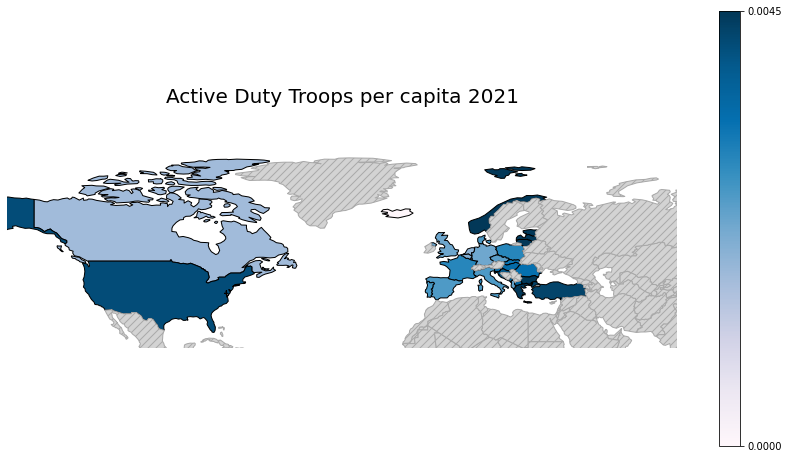

In [ ]:
x = countries
y = troopcap_df["Ally"]

fig, ax = plt.subplots(figsize=(15, 8))
troopcap_df.plot(column='Active Duty Troops per capita 2021', ax=ax, cmap='PuBu', vmin=0 , vmax=.0045,
        missing_kwds= {
         "color": "lightgrey",
         "edgecolor": "darkgrey",
         "hatch": "///",
         "label": "Missing values"} ,
         legend=True,
         legend_kwds={'ticks': [0, .0045]}, edgecolor='black')

# troopcap_df.explore(column='Active Duty Troops per capita 2021',  would love to have used folium eventually to make interactive but I couldn't figure it out 
#              cmap='Set2',
#              legend=False,
#              tooltip=['Ally','Active Duty Troops per capita 2021'],
#              style_kwds=dict(color="black",weight=3, opacity=0.4))

ax.axis('off') 
ax.set_xlim(-150 , 75)
ax.set_ylim(20, 100)
ax.set_title('Active Duty Troops per capita 2021', fontsize=20)
# ax.spines(visible=False)

fig.savefig('troops_percapita_viz.png', dpi=300)

plt.show()

# Military Mobility: NATO Europe

Source: USAREUR-AF(2021). Freedom of Movement Assessment: Cross Border Military Mobility. CUI-REL NATO.

In [ ]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving FoM_border.csv to FoM_border.csv


In [ ]:
mob_df = pd.read_csv("FoM_border.csv")
mob_df.columns

Index(['Ally', 'SPOD', 'APOD', 'Road Systems', 'Rail Head ', 'Dip Clearance'], dtype='object')

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving FoM_Air.csv to FoM_Air.csv


In [ ]:
air_df =pd.read_csv('FoM_Air.csv')
air_df.columns

Index(['Ally', 'Overflight Clearance', 'Landing', 'Clearance Window'], dtype='object')

In [ ]:
mob_df = pd.read_csv("FoM_border.csv")
df = mob_df.loc[ : 27, : ]

In [ ]:
# mean_value=new_df['SPOD'].mean() # I can't tell if it's better to have NaNs for landlocked countries filled with 0s or with the mean for this column
# mean_value # my heart says it's better to have the mean than 0, but I don't know! 

KeyError: ignored

In [ ]:
border_df['SPOD'].fillna(value=df['SPOD'].mean(), inplace=True) # I know it doesn't like that I'm slicing the dataframe, but I couldn't figure out how to define a new dataframe and also merge like I want to in the next cell 

NameError: ignored

In [ ]:
df = border_df.merge(air_df[['Ally', 'Overflight Clearance', 'Landing', 'Clearance Window']], how="left", left_on="Ally", right_on="Ally")
df.head()

,Ally,SPOD,APOD,Road Systems,Rail Head,Dip Clearance,Overflight Clearance,Landing,Clearance Window
0,Albania,2.000000,3.0,1.0,1.0,2.0,2,2,4
1,Belgium,3.000000,3.0,3.0,3.0,2.0,2,2,2
2,Bulgaria,2.000000,3.0,3.0,1.0,2.0,3,3,1
3,Croatia,3.000000,3.0,3.0,1.0,3.0,2,2,2
4,Czech Republic,2.782609,3.0,3.0,3.0,2.0,2,2,3


In [ ]:
categories = ['SPOD',
            'APOD',
            'Road Systems', 
            'Rail Head ',
            'Dip Clearance',
            'Overflight Clearance', 
            'Landing', 
            'Clearance Window']

In [ ]:
N = len(categories)

In [ ]:
angles = []

for i in range(N):
    angles.append((2*pi*i)/float(N))

angles.append(angles[0]) #Add starting angle to the end of the list to complete the circle.
angles

[0.0,
 0.7853981633974483,
 1.5707963267948966,
 2.356194490192345,
 3.141592653589793,
 3.9269908169872414,
 4.71238898038469,
 5.497787143782138,
 0.0]

In [ ]:
df_scaled = df.copy()
for c in categories:
    df_scaled[c] = df_scaled[c] - df_scaled[c].min()
    df_scaled[c] = df_scaled[c] / df_scaled[c].max()
    
df_scaled["APOD"] = 1
df_scaled.head()

,Ally,SPOD,APOD,Road Systems,Rail Head,Dip Clearance,Overflight Clearance,Landing,Clearance Window
0,Albania,0.000000,1,0.0,0.0,0.5,0.0,0.333333,1.000000
1,Belgium,1.000000,1,1.0,1.0,0.5,0.0,0.333333,0.333333
2,Bulgaria,0.000000,1,1.0,0.0,0.5,0.5,0.666667,0.000000
3,Croatia,1.000000,1,1.0,0.0,1.0,0.0,0.333333,0.333333
4,Czech Republic,0.782609,1,1.0,1.0,0.5,0.0,0.333333,0.666667


In [ ]:
mean_values = df_scaled.loc[:,categories].mean().tolist()
mean_values.append(mean_values[0]+ 1e-01) 

mean_values

[0.7826086957142858,
 1.0,
 0.875,
 0.75,
 0.5,
 0.375,
 0.4880952380952381,
 0.6309523809523808,
 0.8826086957142858]

In [ ]:
df['Ally'].tolist()

['Albania',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Turkey',
 'United Kingdom']

In [ ]:
countries =['Albania',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Turkey',
 'United Kingdom']

In [ ]:
df_restricted = df_scaled[df_scaled["Ally"].isin(countries)]
df_restricted[categories] = (df_restricted[categories] + 1e-01).copy()

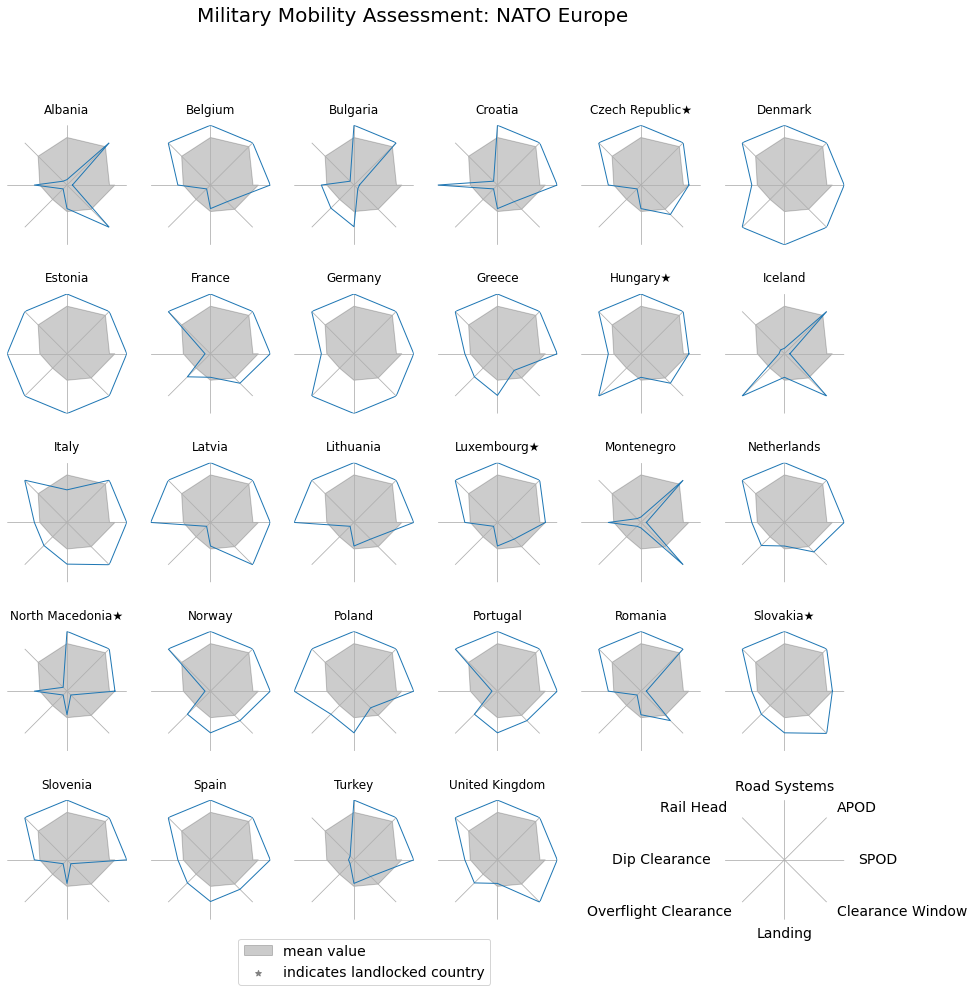

In [ ]:
fig = plt.figure(figsize = (15,15))
fig.suptitle('Military Mobility Assessment: NATO Europe', color = "black" , fontsize=20)

for n in range(df_restricted.shape[0]):
    
    i = df_restricted.index[n]
    country = df_restricted.loc[i,"Ally"]
    
    values = df_restricted.loc[i,categories].values.flatten().tolist()
    values.append(values[0]) #Add starting value to the end of the list to complete the circle.
    
    #Initialize subplot and draw plot. 
    ax = plt.subplot(5,6,n+1, polar=True)
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    #Add filled region for mean values.
    ax.fill(angles, mean_values, color = "black", alpha=0.2, label = "mean value")
    
    #Draw xticks and xlabels (these are the "spokes").
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([], color = "black", fontsize = 10)
    
    #Draw yticks and ylabels (these are the concentric circles).
    ax.set_yticks([])
    ax.set_yticklabels([], color = "black", fontsize = 10)
    ax.set_rlabel_position(0) #Set radial position of y labels.
    
    #Set length of radial lines.
    ax.set_ylim(0,1.1)
    
    #Max outer circle (i.e. xaxis) invisible.
    ax.spines['polar'].set_visible(False)
    
    if country in ['Slovakia', 'North Macedonia', 'Luxembourg', 'Hungary', 'Czech Republic', 'Slovakia']:
        country= country + '\u2605'
    
    #Set title of small plots.
    ax.set_title(country, color = "black")
ax.scatter([],[], marker="*" , label= "indicates landlocked country", color="grey")
    
# Place legend.
plt.legend(bbox_to_anchor=(1.0, -0.1, -0.5, 0), fontsize=14)

#Add empty plot for reference.    
ax = plt.subplot(5,6,30, polar=True)

#Draw xticks and xlabels (these are the "spokes").
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, color = "black", fontsize = 14)


ticklabels = ax.get_xticklabels()
ticklabels[0].set_ha("left") #Move  to the left
ticklabels[1].set_ha("left") #Move  to the left.
ticklabels[2].set_ha("center") #Move to the right.
ticklabels[3].set_ha("right") #Move to the right.
ticklabels[4].set_ha("right") #Move  to the right.
ticklabels[5].set_ha("right") #Move  to the right.
ticklabels[6].set_ha("center") #Move  to the right.
ticklabels[7].set_ha("left") #Move  to the right.


#Draw yticks and ylabels (these are the concentric circles).
ax.set_yticks([])
ax.set_yticklabels([], color = "black", fontsize = 14)
ax.set_rlabel_position(0) #Set radial position of y labels.

#Set length of radial lines.
ax.set_ylim(0,1)

#Max outer circle (i.e. xaxis) invisible.
ax.spines['polar'].set_visible(False)
fig.savefig('mobility_visualization.png', dpi=400)
# Set title.

plt.show()

# Gaussian Mixture Model: Personnel Spending and Military Mobility

In [ ]:
import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Library for plotting.
import matplotlib.pyplot as plt
!pip install --upgrade geopandas
import geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 41.3 MB/s 
     |████████████████████████████████| 16.7 MB 269 kB/s 


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving category_spending_mobility.csv to category_spending_mobility (2).csv


In [ ]:
nato_df = pd.read_csv('category_spending_mobility.csv')
nato_df


,Ally,Personnel,Equipment,Other*,Infrastructure,Mobility Score
0,Albania,50.32,21.30,27.68,0.70,17.0000
1,Belgium,56.31,18.03,23.99,1.67,20.0000
2,Bulgaria,56.65,24.77,13.55,5.03,18.0000
3,Canada,47.50,17.66,31.52,3.32,NaN
4,Croatia,45.67,43.50,9.44,1.40,19.0000
5,Czech Republic,44.84,20.25,26.45,8.46,20.7826
6,Denmark,43.29,22.71,30.36,3.64,26.0000
7,Estonia,32.86,22.05,38.60,6.49,27.0000
8,France,42.53,27.80,26.65,3.02,21.0000
9,Germany,41.70,18.55,36.06,3.69,26.0000


In [ ]:
nato_df["Ally"].unique() 

array(['Albania', 'Belgium', 'Bulgaria', 'Canada', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Montenegro', 'Netherlands', 'North Macedonia',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Turkey', 'United Kingdom', 'United States'], dtype=object)

In [ ]:
nato_df.describe()

,Personnel,Equipment,Other*,Infrastructure,Mobility Score
count,30.000000,30.000000,30.000000,30.000000,28.000000
mean,46.082667,24.497000,22.294667,3.794000,21.139750
std,13.042444,8.223007,9.611042,3.170667,2.884759
min,0.000000,0.000000,0.000000,0.000000,16.000000
25%,40.852500,20.677500,16.440000,1.467500,19.000000
50%,47.710000,23.695000,22.560000,3.140000,21.500000
75%,56.085000,28.197500,29.487500,5.382500,23.000000
max,64.710000,43.500000,41.640000,14.020000,27.000000


In [ ]:
filled_df = nato_df.fillna(21.14) #I kept getting an error when I tried to fill the NaN values with the mean, so this is my work around
filled_df.head()

,Ally,Personnel,Equipment,Other*,Infrastructure,Mobility Score
0,Albania,50.32,21.30,27.68,0.70,17.00
1,Belgium,56.31,18.03,23.99,1.67,20.00
2,Bulgaria,56.65,24.77,13.55,5.03,18.00
3,Canada,47.50,17.66,31.52,3.32,21.14
4,Croatia,45.67,43.50,9.44,1.40,19.00


In [ ]:
X = filled_df[['Personnel', # I chose these two because of my sense that these are the most closely linked to geographic clusters
       'Mobility Score ']].values # adding values unpacks the dataframe 
gm = GaussianMixture(n_components = 3) # specify number of clusters/components.
gm.fit(X)

GaussianMixture(n_components=3)

In [ ]:
labels = gm.predict(X)
labels

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
for idx, label in enumerate(labels): # want to see which country each label from the GM model corresponded to
  print(label)
  print(filled_df['Ally'][idx])
  

0
Albania
0
Belgium
0
Bulgaria
1
Canada
1
Croatia
1
Czech Republic
1
Denmark
1
Estonia
1
France
1
Germany
0
Greece
1
Hungary
2
Iceland
0
Italy
1
Latvia
1
Lithuania
1
Luxembourg
0
Montenegro
1
Netherlands
0
North Macedonia
1
Norway
1
Poland
0
Portugal
0
Romania
1
Slovakia
0
Slovenia
0
Spain
0
Turkey
1
United Kingdom
1
United States


In [ ]:
data = [["Albania", 1], ["Belgium", 1] , ['Bulgaria', 1], ['Canada', 0], # creating a new, more readable dataframe from the labels generated by GM model 
        ['Croatia', 0] , ['Czech Republic', 0], ['Denmark', 0], ['Estonia',0] , 
        ['France',0], ['Germany',0] , [ 'Greece',1] , ['Hungary',0], ['Iceland', 2], 
        ['Italy', 1], ['Latvia',0], ['Lithuania',0],['Luxembourg',0],['Montenegro', 1] ,
        ['Netherlands', 0],['North Macedonia', 1],[ 'Norway', 0], ['Poland', 0],['Portugal', 1],
        ['Romania', 1], ['Slovakia', 0], ['Slovenia', 1],['Spain', 1],
        ['Turkey', 1],['United Kingdom', 0],['United States', 0]]
        

In [ ]:
df = pd.DataFrame(data, columns = ['Ally', 'label'])
df.head()

,Ally,label
0,Albania,1
1,Belgium,1
2,Bulgaria,1
3,Canada,0
4,Croatia,0


In [ ]:
world_df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
for name in world_df['name'].sort_values():
  if name not in list(df['Ally']):
    print(name)

Afghanistan
Algeria
Angola
Antarctica
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belize
Benin
Bhutan
Bolivia
Bosnia and Herz.
Botswana
Brazil
Brunei
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Rep.
Chad
Chile
China
Colombia
Congo
Costa Rica
Cuba
Cyprus
Czechia
Côte d'Ivoire
Dem. Rep. Congo
Djibouti
Dominican Rep.
Ecuador
Egypt
El Salvador
Eq. Guinea
Eritrea
Ethiopia
Falkland Is.
Fiji
Finland
Fr. S. Antarctic Lands
Gabon
Gambia
Georgia
Ghana
Greenland
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
India
Indonesia
Iran
Iraq
Ireland
Israel
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Lebanon
Lesotho
Liberia
Libya
Macedonia
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mexico
Moldova
Mongolia
Morocco
Mozambique
Myanmar
N. Cyprus
Namibia
Nepal
New Caledonia
New Zealand
Nicaragua
Niger
Nigeria
North Korea
Oman
Pakistan
Palestine
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Puerto Rico
Qatar
Russia
Rwanda
S. Sudan
Saudi 

In [ ]:
for name in df['Ally']:
  if name not in list(world_df['name']):
    print(name)

Czech Republic
North Macedonia
United States


In [ ]:
world_df['name'].replace({'United States of America':'United States',
                        'Czechia': 'Czech Republic', 
                        'Macedonia' : 'North Macedonia'}, inplace=True)
world_df['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States',
       'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia',
       'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya',
       'Sudan', 'Chad', 'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas',
       'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands',
       'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay',
       'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica',
       'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize',
       'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador',
       'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana',
       'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger',
       'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea',
       'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso',
       'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Zambia',
       'Malawi', 'Mozambique',

In [ ]:
countries = (['Albania', 'Belgium', 'Bulgaria', 'Canada', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Montenegro', 'Netherlands', 'North Macedonia',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Turkey', 'United Kingdom', 'United States'])

In [ ]:
gm_df = world_df.merge(df[['Ally', 'label']], how="left", left_on="name", right_on="Ally")
gm_df.drop(columns=["name"], inplace=True)
gm_df

,pop_est,continent,iso_a3,gdp_md_est,geometry,Ally,label
0,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.0
4,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN
...,...,...,...,...,...,...,...
172,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,1.0
174,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1218208,North America,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


TypeError: ignored

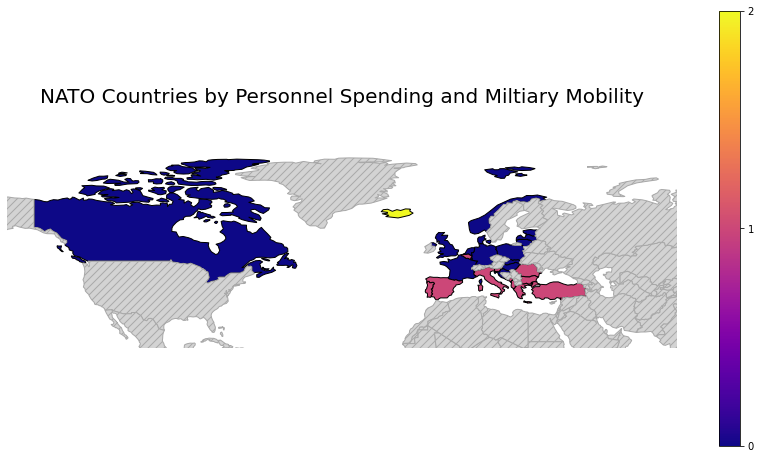

In [ ]:
x = countries # trying to demonstrate there is some geographic relationship going on with these variables  
y = gm_df["Ally"]

fig, ax = plt.subplots(figsize=(15, 8))
gm_df.plot(column='label', ax=ax, cmap='plasma', vmin=0 , vmax= 2,
        missing_kwds= {
         "color": "lightgrey",
         "edgecolor": "darkgrey",
         "hatch": "///",
         "label": "Missing values"} ,
         legend=True,
         legend_kwds={'ticks': [0, 1, 2]}, edgecolor='black')


ax.axis('off') 
ax.set_xlim(-150 , 75)
ax.set_ylim(20, 100)
ax.set_title('NATO Countries by Personnel Spending and Miltiary Mobility', fontsize=20)
ax.spines(visible=False)

fig.savefig('GM_model_labels.png', dpi=300)

plt.show()